# Amazon top 50 bestselling books

Source : [Kaggle.io](https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019)

Dataset contains for each year from 2009 to 2019, the Top 50 best-selling books for that respective year. 
There are a total of 550 entries.

## Objective: Perform Exploratory Data Analysis

__Index__

1. Data Import and Initial Overview

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

### 1. Data Import and Initial Overview

#### 1.1 Data Import

In [2]:
books = pd.read_csv('books.csv')
books.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


#### 1.2 Initial Overview

In [3]:
# Sorting dataset on Year and Book Name
books.sort_values(by = ['Year','Name'], inplace = True)
books.reset_index(inplace = True)
books.head(10)

,index,Name,Author,User Rating,Reviews,Price,Year,Genre
0,14,"Act Like a Lady, Think Like a Man: What Men Re...",Steve Harvey,4.6,5013,17,2009,Non Fiction
1,25,Arguing with Idiots: How to Stop Small Minds a...,Glenn Beck,4.6,798,5,2009,Non Fiction
2,38,"Breaking Dawn (The Twilight Saga, Book 4)",Stephenie Meyer,4.6,9769,13,2009,Fiction
3,50,Crazy Love: Overwhelmed by a Relentless God,Francis Chan,4.7,1542,14,2009,Non Fiction
4,60,Dead And Gone: A Sookie Stackhouse Novel (Sook...,Charlaine Harris,4.6,1541,4,2009,Fiction
5,72,Diary of a Wimpy Kid: The Last Straw (Book 3),Jeff Kinney,4.8,3837,15,2009,Fiction
6,78,Divine Soul Mind Body Healing and Transmission...,Zhi Gang Sha,4.6,37,6,2009,Non Fiction
7,80,"Dog Days (Diary of a Wimpy Kid, Book 4) (Volum...",Jeff Kinney,4.8,3181,12,2009,Fiction
8,91,Eat This Not That! Supermarket Survival Guide:...,David Zinczenko,4.5,720,1,2009,Non Fiction
9,92,"Eat This, Not That! Thousands of Simple Food S...",David Zinczenko,4.3,956,14,2009,Non Fiction


In [4]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        550 non-null    int64  
 1   Name         550 non-null    object 
 2   Author       550 non-null    object 
 3   User Rating  550 non-null    float64
 4   Reviews      550 non-null    int64  
 5   Price        550 non-null    int64  
 6   Year         550 non-null    int64  
 7   Genre        550 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 34.5+ KB


In [5]:
print("Missing Values \n", books.isnull().sum())

Missing Values 
 index          0
Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64


In [6]:
print("Duplicate entries", books.duplicated().sum())

Duplicate entries 0


__Note:__
1. There are no missing values or duplicate entries.
2. Out of 7 variables, 4 are numerical and 3 are text type.

### 2. Summary of Data

### 2.1 Top Performing

##### 2.1.1 Top 10 Reviewed Books

In [7]:
book2 = books.groupby(by = 'Name').aggregate({'Author':'first','User Rating':'mean','Reviews':'mean','Price':'max','Genre':'first'})
results = book2.sort_values(by = ['Reviews','User Rating'], ascending = False)
results.loc[:, ['Author','Reviews','User Rating','Genre']].head(10)

,Author,Reviews,User Rating,Genre
Name,,,,
Where the Crawdads Sing,Delia Owens,87841.0,4.8,Fiction
The Girl on the Train,Paula Hawkins,79446.0,4.1,Fiction
Becoming,Michelle Obama,61133.0,4.8,Non Fiction
Gone Girl,Gillian Flynn,57271.0,4.0,Fiction
The Fault in Our Stars,John Green,50482.0,4.7,Fiction
The Nightingale: A Novel,Kristin Hannah,49288.0,4.8,Fiction
Fifty Shades of Grey: Book One of the Fifty Shades Trilogy (Fifty Shades of Grey Series),E L James,47265.0,3.8,Fiction
The Martian,Andy Weir,39459.0,4.7,Fiction
All the Light We Cannot See,Anthony Doerr,36348.0,4.6,Fiction


##### 2.1.2 Top 10 Rated Books

In [8]:
results.sort_values(by = ['User Rating','Reviews'], ascending = False, inplace = True)
results.loc[:, ['Author','User Rating','Reviews','Genre']].head(10)

,Author,User Rating,Reviews,Genre
Name,,,,
"Harry Potter and the Chamber of Secrets: The Illustrated Edition (Harry Potter, Book 2)",J.K. Rowling,4.9,19622.0,Fiction
"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344.0,Fiction
Dog Man: Fetch-22: From the Creator of Captain Underpants (Dog Man #8),Dav Pilkey,4.9,12619.0,Fiction
"Last Week Tonight with John Oliver Presents A Day in the Life of Marlon Bundo (Better Bundo Book, LGBT Childrens Book)",Jill Twiss,4.9,11881.0,Fiction
"Harry Potter and the Sorcerer's Stone: The Illustrated Edition (Harry Potter, Book 1)",J.K. Rowling,4.9,10052.0,Fiction
Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413.0,Fiction
Strange Planet (Strange Planet Series),Nathan W. Pyle,4.9,9382.0,Fiction
Dog Man: For Whom the Ball Rolls: From the Creator of Captain Underpants (Dog Man #7),Dav Pilkey,4.9,9089.0,Fiction
The Wonderful Things You Will Be,Emily Winfield Martin,4.9,8842.0,Fiction


##### 2.1.3 Highest Rated Free books

In [9]:
results = book2[book2.Price == 0]
results = results.sort_values(by = ['User Rating','Reviews'], ascending = False)
results.loc[:, ['Author','User Rating','Reviews','Genre']]

,Author,User Rating,Reviews,Genre
Name,,,,
Little Blue Truck,Alice Schertle,4.9,1884.0,Fiction
"Diary of a Wimpy Kid: Hard Luck, Book 8",Jeff Kinney,4.8,6812.0,Fiction
The Getaway,Jeff Kinney,4.8,5836.0,Fiction
"Cabin Fever (Diary of a Wimpy Kid, Book 6)",Jeff Kinney,4.8,4505.0,Fiction
The Constitution of the United States,Delegates of the Constitutional,4.8,2774.0,Non Fiction
Frozen (Little Golden Book),RH Disney,4.7,3642.0,Fiction
The Short Second Life of Bree Tanner: An Eclipse Novella (The Twilight Saga),Stephenie Meyer,4.6,2122.0,Fiction
JOURNEY TO THE ICE P,RH Disney,4.6,978.0,Fiction


##### 2.1.4 Most Reviewed Non-Fiction

In [10]:
results = book2[book2.Genre == 'Non Fiction']
results = results.sort_values(by = ['Reviews','User Rating'], ascending = False)
results.loc[:, ['Author','User Rating','Reviews']].head(10)

,Author,User Rating,Reviews
Name,,,
Becoming,Michelle Obama,4.8,61133.0
"Unbroken: A World War II Story of Survival, Resilience, and Redemption",Laura Hillenbrand,4.8,29673.0
Educated: A Memoir,Tara Westover,4.7,28729.0
The Subtle Art of Not Giving a F*ck: A Counterintuitive Approach to Living a Good Life,Mark Manson,4.6,26490.0
The 5 Love Languages: The Secret to Love that Lasts,Gary Chapman,4.8,25554.0
How to Win Friends & Influence People,Dale Carnegie,4.7,25001.0
The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics,Daniel James Brown,4.8,23358.0
The Four Agreements: A Practical Guide to Personal Freedom (A Toltec Wisdom Book),Don Miguel Ruiz,4.7,23308.0
"School Zone - Big Preschool Workbook - Ages 4 and Up, Colors, Shapes, Numbers 1-10, Alphabet, Pre-Writing, Pre-Reading…",School Zone,4.8,23047.0


##### 2.1.5 Most Reviewed Fiction

In [11]:
results = book2[book2.Genre == 'Fiction']
results = results.sort_values(by = ['Reviews','User Rating'], ascending = False)
results.loc[:, ['Author','User Rating','Reviews']].head(10)

,Author,User Rating,Reviews
Name,,,
Where the Crawdads Sing,Delia Owens,4.8,87841.0
The Girl on the Train,Paula Hawkins,4.1,79446.0
Gone Girl,Gillian Flynn,4.0,57271.0
The Fault in Our Stars,John Green,4.7,50482.0
The Nightingale: A Novel,Kristin Hannah,4.8,49288.0
Fifty Shades of Grey: Book One of the Fifty Shades Trilogy (Fifty Shades of Grey Series),E L James,3.8,47265.0
The Martian,Andy Weir,4.7,39459.0
All the Light We Cannot See,Anthony Doerr,4.6,36348.0
The Alchemist,Paulo Coelho,4.7,35799.0


##### 2.1.6 Highest Rated books below USD 5

In [12]:
results = book2[book2.Price <= 5]
results = results.sort_values(by = ['User Rating','Price'], ascending = False)
results.head(10)

,Author,User Rating,Reviews,Price,Genre
Name,,,,,
"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344.0,5,Fiction
The Magnolia Story,Chip Gaines,4.9,7861.0,5,Non Fiction
Dog Man: Brawl of the Wild: From the Creator of Captain Underpants (Dog Man #6),Dav Pilkey,4.9,7235.0,4,Fiction
Little Blue Truck,Alice Schertle,4.9,1884.0,0,Fiction
The Very Hungry Caterpillar,Eric Carle,4.9,19546.0,5,Fiction
Creative Haven Owls Coloring Book (Adult Coloring),Marjorie Sarnat,4.8,3871.0,5,Non Fiction
Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922.0,5,Fiction
Goodnight Moon,Margaret Wise Brown,4.8,8837.0,5,Fiction
Love You Forever,Robert Munsch,4.8,18613.0,5,Fiction


#### 2.2 Statistical Summaries

In [13]:
books.describe()

,index,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000,550.000000
mean,274.500000,4.618364,11953.281818,13.100000,2014.000000
std,158.915596,0.226980,11731.132017,10.842262,3.165156
min,0.000000,3.300000,37.000000,0.000000,2009.000000
25%,137.250000,4.500000,4058.000000,7.000000,2011.000000
50%,274.500000,4.700000,8580.000000,11.000000,2014.000000
75%,411.750000,4.800000,17253.250000,16.000000,2017.000000
max,549.000000,4.900000,87841.000000,105.000000,2019.000000


In [14]:
books['Genre'].value_counts()

Non Fiction    310
Fiction        240
Name: Genre, dtype: int64

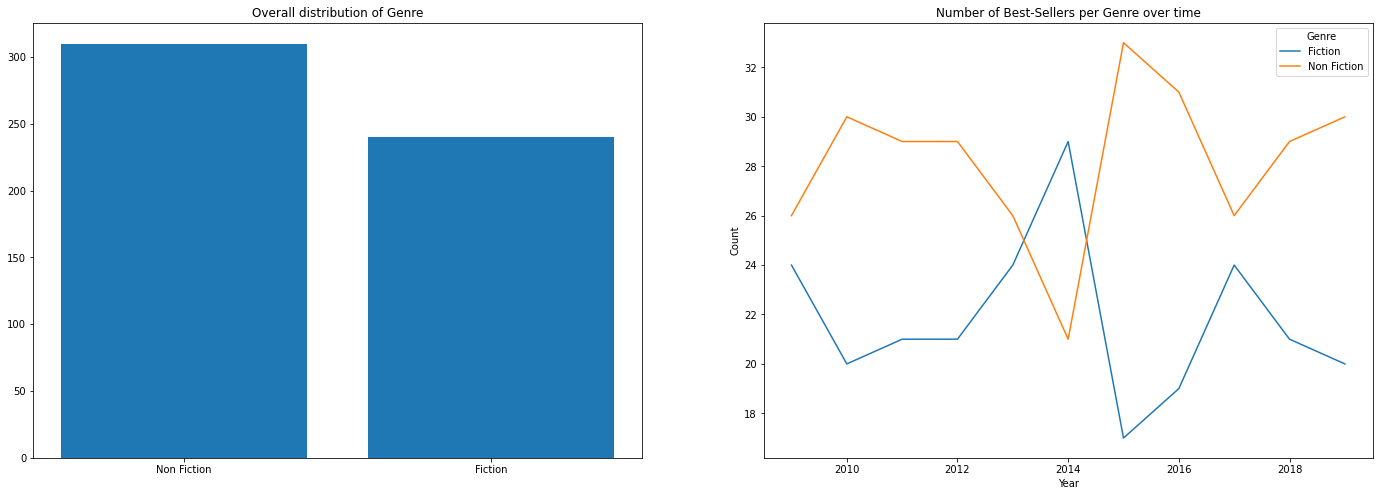

In [15]:
# Distribution of Genre
table = books.groupby(['Year','Genre']).aggregate({'Year':'count'})
table.rename(columns={'Year':'Year','Genre':'Genre','Year':'Count'}, inplace = True)

fig, ax = plt.subplots(1, 2, figsize=(24,8))
# Bar Plot
ax[0].bar(height = books['Genre'].value_counts(), x = pd.unique(books['Genre']))
ax[0].set_title('Overall distribution of Genre')
# Line Plot
sns.lineplot(data = table, x = 'Year', y = 'Count', hue = 'Genre')
ax[1].set_title('Number of Best-Sellers per Genre over time')
plt.show()

__Note:__
1. From 2009 - 2019, Non-Fiction(56.3%) books have more often been on the best-selling list than Non-Fiction(43.6%)
2. Post 2017, we see that Non-Fction books have more often been on the Best-Selling list.

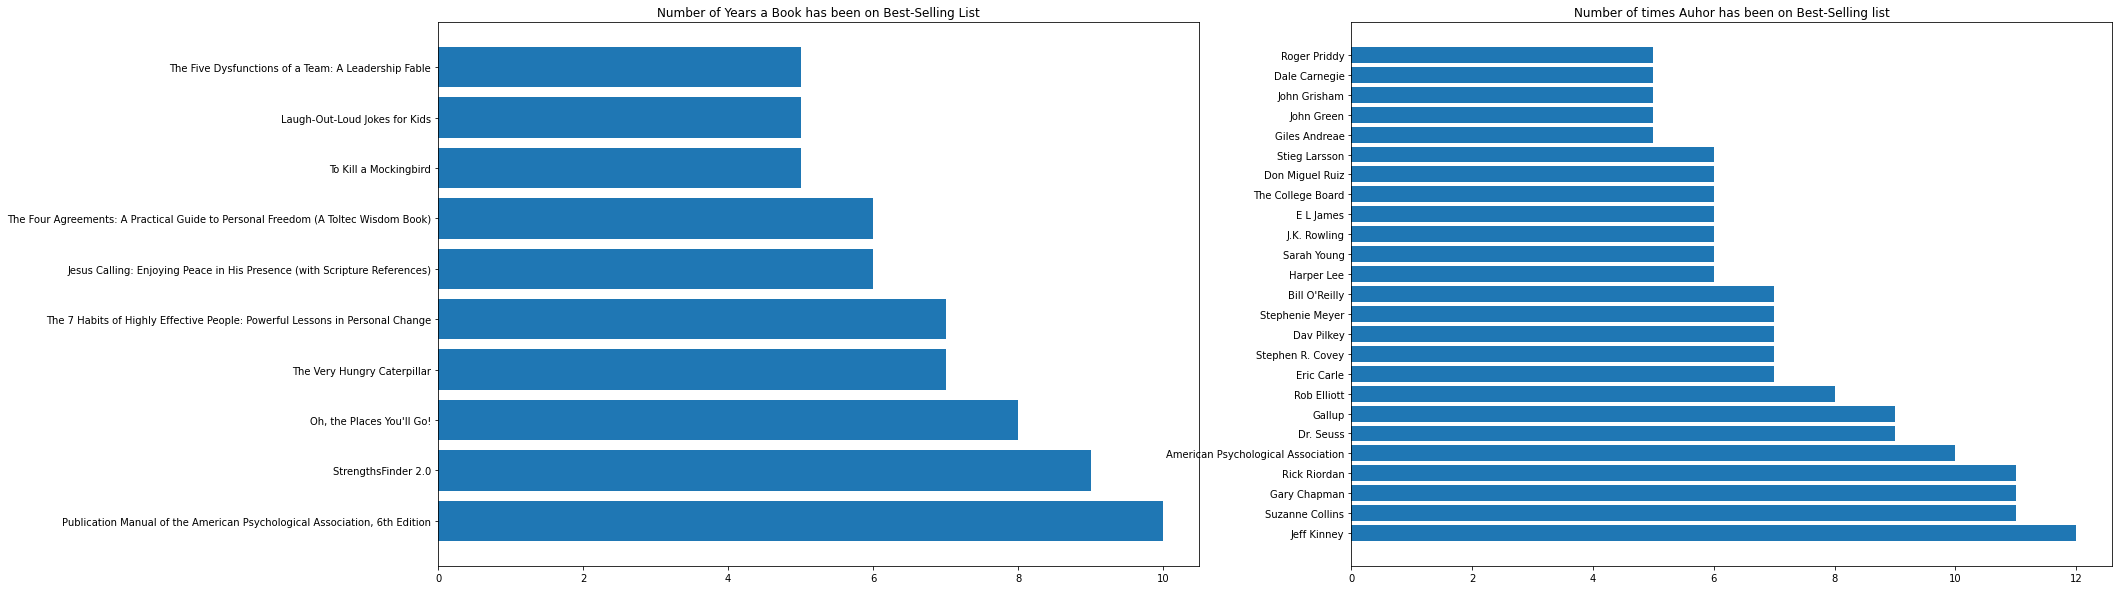

In [16]:
# Summary of Book and Authors
table_book = books['Name'].value_counts()
table_book = table_book.head(10)

table_auth = books['Author'].value_counts()
table_auth = table_auth.head(25)

fig, ax = plt.subplots(1, 2, figsize=(30,10))
# Books
ax[0].barh(y = table_book.index, width = table_book.values)
ax[0].set_title('Number of Years a Book has been on Best-Selling List')
# Authors
ax[1].barh(y = table_auth.index, width = table_auth.values)
ax[1].set_title('Number of times Auhor has been on Best-Selling list')
plt.show()

__Note:__

In the time frame of 2009 - 2019, _Jeff Kinney_ is the best selling author and _Publication Manual of the American Psycological Asociation (6th Edition)_ has always been on the best-selling list.